**AD 699 A2 Data Mining for Business Analytics (Spring 2025)**

**Final Project**

**Submitted BY : Prabu Jeyabalan , Moiz Deshmukh , Jitvan Vij.**

# **1.Introduction**

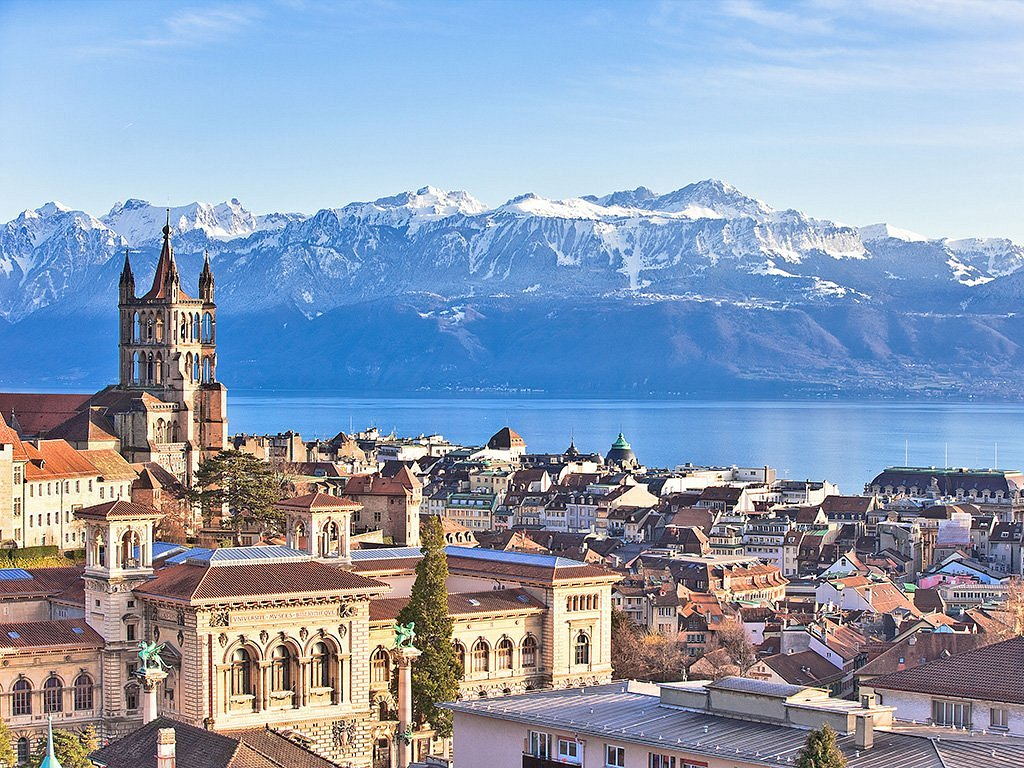


*Vaud (/voʊ/ VOH; French: (Canton de) Vaud, pronounced more formally the Canton of Vaud, is one of the 26 cantons forming the Swiss Confederation. It is composed of ten districts; its capital city is Lausanne. Its coat of arms bears the motto "Liberté et patrie" on a white-green bicolour.*

*Vaud is the third-largest Swiss canton by population and fourth by size. It is located in Romandy, the French-speaking western part of the country, and borders the canton of Neuchâtel to the north, the cantons of Fribourg and Bern to the east, the canton of Valais to the south, the canton of Geneva to the south-west, and France to the west. The geography of the canton includes all three natural regions of Switzerland: the Jura Mountains, the Swiss Plateau, and the (Swiss) Alps. It also includes some of the largest lakes of the country: Lake Geneva and Lake Neuchâtel. It is a major tourist destination, renowned for its landscapes and gastronomy.*

*The largest city is Lausanne, followed by Yverdon-les-Bains and Montreux. As of 2020, the canton had a population of 814,762.It is one of the four cantons where French is the sole official language, and it is the canton with the largest number of French speakers. Formerly a Bernese bailiwick, Vaud joined the Swiss Confederation as an independent canton in 1803.*


**Why Vaud?**

- *We chose Vaud for our Airbnb dataset analysis because it offers a diverse mix of urban, suburban, and rural listings, making it ideal for uncovering meaningful patterns in rental behavior.*

- *The region includes popular tourist destinations like Lausanne and Montreux, which contribute to variability in price, room types, and demand essential factors for effective clustering and modeling.*

- *Additionally, Vaud has a rich dataset with 75 columns and 5286 rows which gives sufficient volume and distinct seasonal trends, enabling more robust analysis and insightful comparisons.*

# **2.1 Data Preparation & Exploration (20 points)**

In [922]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [923]:
vaud = pd.read_csv('vaud_listings.csv')
vaud.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,7381.0,https://www.airbnb.com/rooms/7381,2.024020e+13,2/12/2024,city scrape,Rental unit in Vers L'Eglise · ★4.74 · 1 bedro...,Beautifully renovated two-room apartment in ch...,"The chalet is located in a small, typical Swis...",https://a0.muscache.com/pictures/23261/dd61f58...,19480,...,4.81,4.74,4.68,NaN,f,1,1,0,0,0.41
1,26809.0,https://www.airbnb.com/rooms/26809,2.024020e+13,2/12/2024,previous scrape,Rental unit in Pully · ★4.90 · 1 bedroom · 1 b...,"Private, comfortable and quiet bedroom with qu...",This is a nice and quiet location in the upper...,https://a0.muscache.com/pictures/1232457/5e01d...,94917,...,4.97,4.72,4.89,NaN,f,1,0,1,0,0.71
2,50123.0,https://www.airbnb.com/rooms/50123,2.024020e+13,2/12/2024,city scrape,Rental unit in Mont-sur-Rolle · 1 bedroom · 4 ...,NaN,NaN,https://a0.muscache.com/pictures/287593/b9d165...,229512,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
3,129558.0,https://www.airbnb.com/rooms/129558,2.024020e+13,2/12/2024,previous scrape,Rental unit in Lausanne · 1 bedroom · 1 bed · ...,NaN,NaN,https://a0.muscache.com/pictures/981198/45f049...,638930,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
4,259823.0,https://www.airbnb.com/rooms/259823,2.024020e+13,2/12/2024,previous scrape,Rental unit in La Tour-de-Peilz · ★4.69 · 2 be...,This large apartment is very charming with a l...,La Tour-de-Peilz is a very charming town with ...,https://a0.muscache.com/pictures/dea22482-970b...,1363446,...,5.00,4.83,4.58,NaN,f,1,1,0,0,0.16


In [924]:
vaud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5286 entries, 0 to 5285
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5286 non-null   float64
 1   listing_url                                   5286 non-null   object 
 2   scrape_id                                     5286 non-null   float64
 3   last_scraped                                  5286 non-null   object 
 4   source                                        5286 non-null   object 
 5   name                                          5286 non-null   object 
 6   description                                   5095 non-null   object 
 7   neighborhood_overview                         2518 non-null   object 
 8   picture_url                                   5286 non-null   object 
 9   host_id                                       5286 non-null   i

**1. Missing Values**

In [925]:
# Total missing values per column
missing_vals = vaud.isnull().sum()
missing_vals[missing_vals > 0].sort_values(ascending=False)

,0
license,5286
calendar_updated,5286
host_neighbourhood,5066
host_about,2939
neighbourhood,2768
neighborhood_overview,2768
host_response_time,1748
host_response_rate,1748
bathrooms,1507
beds,1507


In [926]:
# Step 1: Drop columns with more than 40% missing values
high_na_cols = [
    'license', 'calendar_updated', 'host_neighbourhood', 'host_about',
    'neighbourhood', 'neighborhood_overview'
]
vaud_cleaned = vaud.drop(columns=high_na_cols)

# Step 2: Drop rows with missing price (since it's the predictor/target variable)
vaud_cleaned = vaud_cleaned.dropna(subset=['price'])

# Step 3: Fill numeric features with median
vaud_cleaned['beds'] = vaud_cleaned['beds'].fillna(vaud_cleaned['beds'].median())
vaud_cleaned['bedrooms'] = vaud_cleaned['bedrooms'].fillna(vaud_cleaned['bedrooms'].median())
vaud_cleaned['bathrooms'] = vaud_cleaned['bathrooms'].fillna(vaud_cleaned['bathrooms'].median())

# Step 4: Fill review-related columns with 0 (treat as no reviews)
review_cols = [col for col in vaud_cleaned.columns if 'review_scores' in col or 'reviews_per_month' in col]
vaud_cleaned[review_cols] = vaud_cleaned[review_cols].fillna(0)

# Step 5: Fix percentages, then fill missing values for host rates
# Convert percentage strings (e.g., '95%') to float (e.g., 95.0)
vaud_cleaned['host_response_rate'] = vaud_cleaned['host_response_rate'].str.rstrip('%').astype(float)
vaud_cleaned['host_acceptance_rate'] = vaud_cleaned['host_acceptance_rate'].str.rstrip('%').astype(float)

# Fill missing values with median
vaud_cleaned['host_response_rate'] = vaud_cleaned['host_response_rate'].fillna(vaud_cleaned['host_response_rate'].median())
vaud_cleaned['host_acceptance_rate'] = vaud_cleaned['host_acceptance_rate'].fillna(vaud_cleaned['host_acceptance_rate'].median())

# Fill remaining categorical columns with appropriate values
vaud_cleaned['host_response_time'] = vaud_cleaned['host_response_time'].fillna(vaud_cleaned['host_response_time'].mode()[0])
vaud_cleaned['host_location'] = vaud_cleaned['host_location'].fillna("Unknown")
vaud_cleaned['description'] = vaud_cleaned['description'].fillna("No description provided.")
vaud_cleaned['host_is_superhost'] = vaud_cleaned['host_is_superhost'].fillna(vaud_cleaned['host_is_superhost'].mode()[0])
vaud_cleaned['has_availability'] = vaud_cleaned['has_availability'].fillna('f')
vaud_cleaned['bathrooms_text'] = vaud_cleaned['bathrooms_text'].fillna("Unknown")

# Step 6: Drop rows with no review dates:
vaud_cleaned = vaud_cleaned.dropna(subset=['first_review', 'last_review'])

# step 7: Convert price column to float by removing dollar sign and commas
vaud_cleaned['price'] = vaud_cleaned['price'].replace('[\$,]', '', regex=True).astype(float)

vaud_cleaned1 = vaud_cleaned.copy()
vaud_cleaned2 = vaud_cleaned.copy()
vaud_cleaned3 = vaud_cleaned.copy()
vaud_cleaned4 = vaud_cleaned.copy()
vaud_cleaned5 = vaud_cleaned.copy()

In [927]:
vaud_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041 entries, 0 to 5259
Data columns (total 69 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3041 non-null   float64
 1   listing_url                                   3041 non-null   object 
 2   scrape_id                                     3041 non-null   float64
 3   last_scraped                                  3041 non-null   object 
 4   source                                        3041 non-null   object 
 5   name                                          3041 non-null   object 
 6   description                                   3041 non-null   object 
 7   picture_url                                   3041 non-null   object 
 8   host_id                                       3041 non-null   int64  
 9   host_url                                      3041 non-null   object

**Write one paragraph describing what you did, and why you did it. (Note: You may wish to deal with missing values differently for different tasks. You are not locked in to a decision regarding missing values). Throughout the various steps, you may also wish to consider the way you’ll handle outliers.**

**Steps Taken to Handle Missing Values and Prepare the Data:**

***1. Dropped Columns with High Missing Values:***

*What I did: Removed columns with more than 40% missing data.*

*Why: These columns (e.g., license, host_about, neighbourhood) are too sparse to contribute reliable insights to modeling or analysis.*

**2. Removed Rows with Missing price:**

*What I did: Dropped rows where the price (the target variable) was missing.*

*Why: Since price is the variable we're trying to predict or model, we need it to be present for any supervised learning or analysis.*

**3. Filled Missing Values in Numeric Features with the Median:**

*What I did: Used the median to fill missing values in columns like beds, bedrooms, and bathrooms.*

*Why: Median is less affected by extreme values or outliers, making it a safer choice for skewed distributions.*

**4. Replaced Missing Review Metrics with 0:**

*What I did: Filled missing values in review-related columns like review_scores_rating, review_scores_cleanliness, and reviews_per_month with 0.*

*Why: A missing review score likely means no reviews were given, so filling with zero represents this absence effectively.*

**5. Cleaned and Filled Percentage Columns:**

*What I did:Removed the % sign and converted host_response_rate and host_acceptance_rate to float.Then filled missing values with their respective median values.*

*Why: These were stored as strings (e.g., "95%"), which would throw errors in numeric analysis. Median provides a neutral imputation strategy.*

**6. Handled Categorical Columns with Mode or Placeholder:**

*What I did:Filled host_response_time and host_is_superhost with their most frequent (mode) values.Replaced missing host_location and bathrooms_text with "Unknown".*

*Filled description with "No description provided."*

*Filled has_availability with 'f' (false).*

*Why: Mode is appropriate for categorical imputation. For text-based fields, a clear placeholder preserves the row while signaling missingness.*

**7. Dropped Rows Without Review Dates:**

*What I did: Dropped rows where both first_review and last_review were missing.*

*Why: These fields may be needed for time series analysis or modeling trends over time. Their absence limits insight.*

**2. Summary Statistics**

- **Take a peek at your data, and look at some of the ways that it’s organized by area. To do this, you may wish to use neighbourhood, or neighbourhood_cleansed variables (note the UK spelling of these words). If one of these groups has many levels, you could try a top_n filter or find a way to combine some of them together. Alternatively, you could use the lat/long variables to divide your city however you wish to. Next, generate at least 5 different summary stats that reveal things about the differences (or lack thereof) among the areas in your city.**

- **Show your results. Describe your findings in 1-2 paragraphs. For each stat you found, what is your team’s takeaway?**

In [928]:
# Get top 10 neighborhoods by number of listings
top_neigh = vaud_cleaned['neighbourhood_cleansed'].value_counts().nlargest(10).index
vaud_top = vaud_cleaned[vaud_cleaned['neighbourhood_cleansed'].isin(top_neigh)]

# 1. Median price by neighbourhood
mean_price = vaud_top.groupby('neighbourhood_cleansed')['price'].median().sort_values(ascending=False)
print("Median Price by Neighbourhood:\n\n", mean_price)

Median Price by Neighbourhood:

 neighbourhood_cleansed
Ollon            237.5
Ormont-Dessus    214.0
Château-d'Oex    194.0
Gryon            193.0
Montreux         150.0
Leysin           137.0
Lutry            130.0
Nyon             114.0
Morges           107.0
Lausanne          99.0
Name: price, dtype: float64


***Median Price by Neighborhood***

- *Ollon and Ormont-Dessus are the most expensive neighborhoods with median prices of \$237.5 and \$214 respectively, while Lausanne has the most affordable median price at \$99. This suggests Ollon and Ormont-Dessus cater to higher-end travelers or offer larger accommodations.*

In [929]:
# 2. Average number of bedrooms by neighbourhood
Average_bedrooms = vaud_top.groupby('neighbourhood_cleansed')['bedrooms'].mean().sort_values(ascending=False).astype(int)
print("\nAverage Bedrooms by Neighbourhood:\n\n", Average_bedrooms)


Average Bedrooms by Neighbourhood:

 neighbourhood_cleansed
Château-d'Oex    2
Ormont-Dessus    2
Gryon            2
Ollon            2
Leysin           1
Montreux         1
Lutry            1
Nyon             1
Lausanne         1
Morges           1
Name: bedrooms, dtype: int64


***Average Bedrooms by Neighborhood***

- *Neighborhoods like Château-d'Oex, Gryon, Ollon, and Ormont-Dessus average 2 bedrooms per listing, indicating larger properties. In contrast, the rest—including Lausanne, Nyon, and Morges—typically offer 1-bedroom accommodations, which may appeal more to solo travelers or couples.*

In [930]:
# 3. Average review score by neighbourhood
avg_review_score = vaud_top.groupby('neighbourhood_cleansed')['review_scores_rating'].mean().sort_values(ascending=False)
print("\nAverage Review Score by Neighbourhood:\n\n", avg_review_score)


Average Review Score by Neighbourhood:

 neighbourhood_cleansed
Ormont-Dessus    4.877976
Château-d'Oex    4.845588
Leysin           4.837568
Gryon            4.768480
Ollon            4.763556
Nyon             4.706154
Montreux         4.685040
Lausanne         4.683962
Lutry            4.670217
Morges           4.581667
Name: review_scores_rating, dtype: float64


**Average Review Scores by Neighborhood**

- *Ormont-Dessus tops the list with a high average review score of 4.88, followed closely by Château-d'Oex (4.85) and Leysin (4.84). This reflects consistently positive guest experiences in these areas, suggesting strong host engagement and overall satisfaction.*

In [931]:
# 4. Count of listings by property type per neighbourhood
property_counts = vaud_top.groupby(['neighbourhood_cleansed', 'property_type'])['id'].count().unstack(fill_value=0)
property_counts

# Transpose the DataFrame
property_counts_transposed = property_counts.T

# Display the transposed DataFrame
property_counts_transposed

neighbourhood_cleansed,Château-d'Oex,Gryon,Lausanne,Leysin,Lutry,Montreux,Morges,Nyon,Ollon,Ormont-Dessus
property_type,,,,,,,,,,
Casa particular,0,0,1,0,0,0,0,0,0,0
Castle,0,0,0,0,0,7,0,0,0,0
Entire cabin,1,0,0,0,0,0,0,0,0,1
Entire chalet,18,38,1,15,0,5,0,0,28,26
Entire condo,7,11,54,17,3,19,0,2,29,11
Entire guest suite,0,0,0,0,1,2,0,0,0,0
Entire guesthouse,0,0,1,1,1,0,0,0,0,0
Entire home,2,7,1,3,5,12,0,1,22,3
Entire loft,0,3,6,1,0,6,0,0,3,0


***Count of Listings by Property Type per Neighbourhood***

***Dominant Property Types***

- *Entire rental units are the most frequently listed property type across all neighborhoods, especially in Lausanne (362 listings) and Ollon (179). This indicates a strong preference among hosts to rent out fully self-contained accommodations, likely catering to travelers seeking privacy and flexibility.*

In [932]:
# 5. Average availability (how many days per year listings are open)
avg_availability = vaud_top.groupby('neighbourhood_cleansed')['availability_365'].median().sort_values(ascending=False).astype(int)
print("\nMedian Availability (days per year) by Neighbourhood:\n\n", avg_availability)


Median Availability (days per year) by Neighbourhood:

 neighbourhood_cleansed
Ormont-Dessus    287
Ollon            273
Gryon            238
Leysin           234
Château-d'Oex    218
Lausanne         195
Lutry            193
Montreux         179
Nyon             161
Morges            82
Name: availability_365, dtype: int64


***Median Availability by Neighborhood***

- *Ormont-Dessus and Ollon have the highest availability at 287 and 273 days/year, indicating year-round access and likely full-time listings. In contrast, Morges has the lowest median availability at just 82 days/year, pointing toward more seasonal or part-time use.*

**3. Data Visualization**

- **Now generate five visualizations that help you to better understand the various neighborhoods, or regions, in your city. Be creative! This is intentionally very open-ended. The only requirement is that each one of your plots offers information about your city and its regions. Make five different types of plots for this.**

**1. Choropleth - Map (Price by Location)**

In [933]:
import plotly.express as px
fig = px.scatter_mapbox(
    vaud_cleaned,
    lat='latitude',
    lon='longitude',
    color='price',
    size='price',
    color_continuous_scale='Viridis',
    size_max=30,
    zoom=8,
    hover_data=['neighbourhood_cleansed', 'price']
)

fig.update_layout(
    mapbox_style="open-street-map",
    title='Airbnb Prices by Location in Vaud',
    mapbox_center={"lat": 46.5, "lon": 6.6}
)

fig.show()

**Key Insights:**

**1. High Price Clusters Are Localized**

- *A notable high-price cluster appears in the east-central region, especially near the Les Diablerets and Château-d'Oex area. One listing shows a price above 4000 USD, suggesting luxury accommodations or resort-style properties in this alpine zone.*

- *These areas are likely popular for ski resorts, luxury chalets, or scenic retreats, which justifies the high prices.*

**2. Dense but Moderately Priced Listings Along Lake Geneva**

- *The stretch from Lausanne to Montreux shows a dense concentration of listings. Prices here are mostly moderate (100–300 USD).*

- *These cities are major urban centers with excellent public transport, tourist attractions, universities, and proximity to Lake Geneva, making them popular but competitive — hence relatively moderate prices.*

**3. Affordable Options in Outer and Rural Regions**

- *Listings further north and west of Lausanne, near Parc naturel régional Jura vaudois, show smaller, darker bubbles, indicating lower prices — typically under 100–150 USD.*

- *These are more rural or suburban, potentially attracting long-term stays or locals.*

**4. Sparse Listings in Remote Zones**

- *The higher elevation and less urbanized regions show fewer listings, reflecting either low demand or restrictive zoning.*

- *However, a few of these remote properties still command premium prices, likely due to exclusivity, unique experiences (e.g., lakeside lodges, mountaintop retreats), or seasonal ski demand.*

**2. Bar Plot of Average Price by Neighborhood**

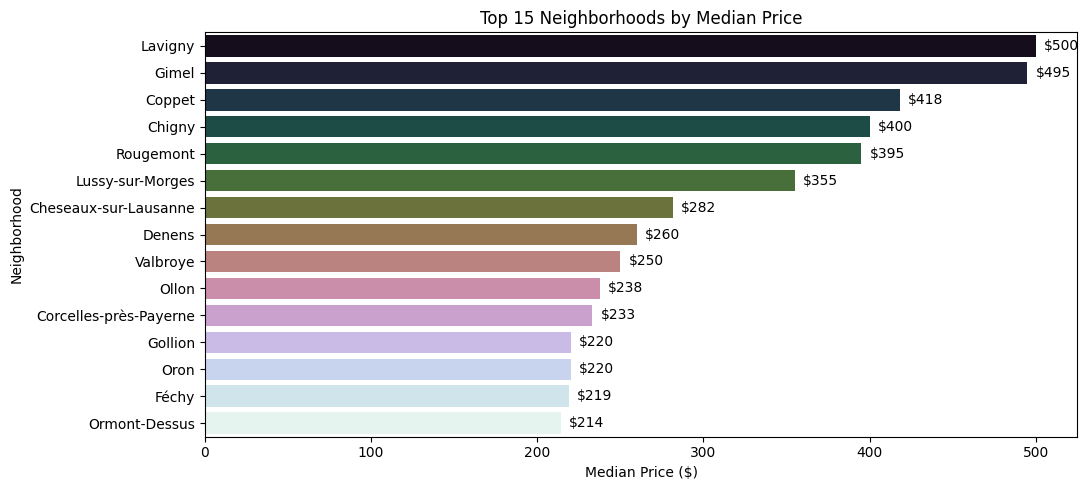

In [934]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Grouping and sorting
avg_price_by_neigh = vaud_cleaned.groupby('neighbourhood_cleansed')['price'].median().sort_values(ascending=False).head(15)

# Plot
plt.figure(figsize=(11, 5))
ax = sns.barplot(
    x=avg_price_by_neigh.values,
    y=avg_price_by_neigh.index,
    palette= 'cubehelix'
)

# Add value labels on bars
for i, (value, name) in enumerate(zip(avg_price_by_neigh.values, avg_price_by_neigh.index)):
    plt.text(value + 5, i, f'${value:.0f}', va='center')

# Titles and labels
plt.title("Top 15 Neighborhoods by Median Price")
plt.xlabel("Median Price ($)")
plt.ylabel("Neighborhood")
plt.tight_layout()
plt.show()

**Inference**

- *Lavigny and Gimel lead the list with median Airbnb prices of $500 and $495 respectively — significantly higher than other neighborhoods.*

   *This suggests these areas might cater to luxury accommodations or offer unique value (e.g., scenic vineyards, proximity to nature, or premium lodging).*

- *Coppet, Chigny, and Rougemont follow closely, all with median prices around $400+, indicating these are also high-demand, possibly affluent or touristic zones.*

   *From mid-range to lower prices:*

- *Valbroye to Ormont-Dessus reflect more moderate to affordable neighborhoods with prices between usd 250 to usd 214.*

- *These might be more residential, less touristy, or offer simpler accommodations.*



**3. Box Plot of Price Distributions by Room Type**

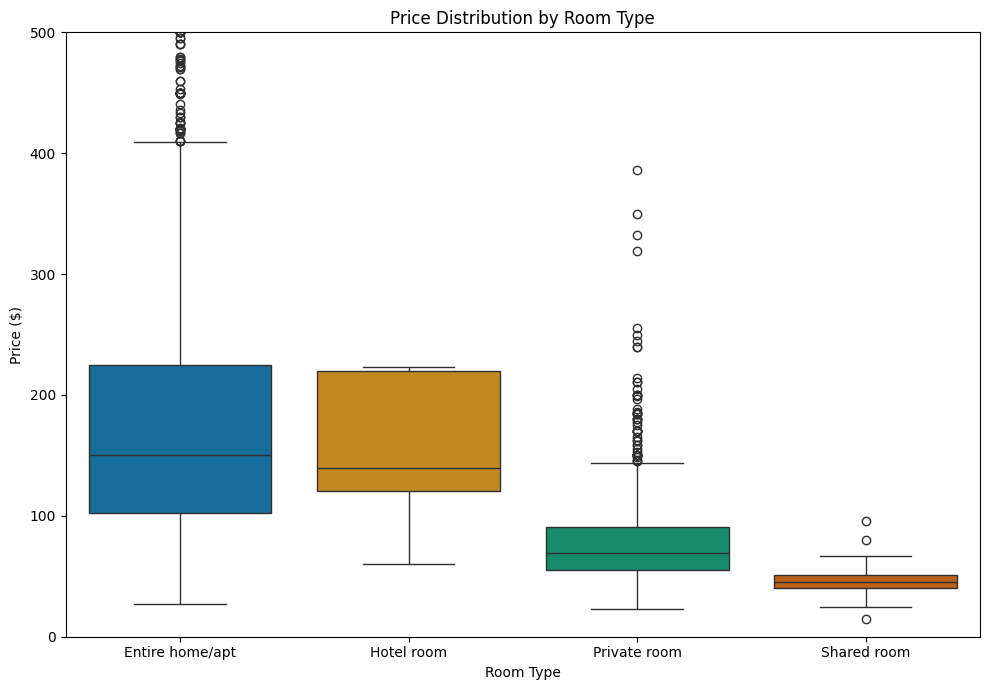

In [935]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='room_type', y='price', data=vaud_cleaned,palette="colorblind")
plt.ylim(0, 500)  # Adjust based on your price scale
plt.title("Price Distribution by Room Type")
plt.ylabel("Price ($)")
plt.xlabel("Room Type")
plt.tight_layout()
plt.show()


**Inference**

**Entire home/apt**

*Min: ~30, Max: ~400, Q1: ~100, Q3: ~230, IQR: ~130*

*This room type has the highest median price and wide price variation, reflecting a broad range of property types.*

*Frequent outliers suggest premium listings like luxury villas or scenic homes.*

**Hotel room**

*Min: ~60, Max: ~225, Q1: ~120, Q3: ~220, IQR: ~100*

*Hotel rooms show a moderately high median price with relatively consistent pricing.*

*A few outliers indicate high-end hotel suites or seasonal pricing spikes.*

**Private room**

*Min: ~25, Max: ~120, Q1: ~60, Q3: ~90, IQR: ~30*

*Private rooms are lower-priced with a tight interquartile range, offering consistent affordability.*

*Some outliers exist, likely for premium rooms in central or high-demand areas.*

**Shared room**

*Min: ~20, Max: ~70, Q1: ~35, Q3: ~50, IQR: ~15*

*Shared rooms have the lowest prices and smallest price spread across listings.
Minimal outliers confirm this category’s stability and budget-friendly appeal.*

**4. Count Plot of Listings per Room Type per Neighborhood Group**

In [936]:
import plotly.express as px

# Create the plot
fig = px.histogram(
    data_frame=vaud_cleaned,
    x='neighbourhood_group_cleansed',
    color='room_type',
    barmode='group',
    text_auto=True,
    color_discrete_sequence=px.colors.qualitative.Set2,
    category_orders={
        "neighbourhood_group_cleansed": sorted(vaud_cleaned['neighbourhood_group_cleansed'].unique())
    }
)

# Set all text labels outside the bars
fig.update_traces(textposition='outside')

# Add vertical lines between groups
x_vals = sorted(vaud_cleaned['neighbourhood_group_cleansed'].unique())
for i in range(1, len(x_vals)):
    fig.add_vline(
        x=i - 0.5,
        line=dict(color="gray", dash="dot"),
        opacity=0.4
    )

# Customize layout
fig.update_layout(
    title="Room Type Distribution Across Neighborhood Groups",
    xaxis_title="Neighborhood Group",
    yaxis_title="Listing Count",
    xaxis_tickangle=-45,
    bargap=0.2,
    legend_title_text='Room Type',
    template='plotly_white'
)

fig.show()

**Inference: Room Type Distribution by Neighborhood Group**

- *Entire home/apartments dominate listings across all neighborhood groups, especially in Aigle (688) and Lausanne (462). Private rooms are the second most common, notably high in Lausanne (211) and Jura-Nord vaudois (85). Hotel and shared rooms are scarce, indicating Airbnb in Vaud is primarily used for full-property rentals and private stays.*

**5. Bubble Chart: Availability vs. Price by Room Type (Bubble Size = Reviews)**

In [937]:
import plotly.express as px

fig = px.scatter(
    vaud_cleaned,
    x='availability_365',
    y='price',
    color='room_type',
    size='number_of_reviews',
    hover_data=['neighbourhood_cleansed'],
    title='Availability vs. Price by Room Type (Bubble Size = Reviews)'
)
fig.update_layout(
    title="Availability vs. Price by Room Type (Bubble Size = Reviews)",
    xaxis_title="Availability (Days/Year)",
    yaxis_title="Price ($)",
    yaxis=dict(range=[0, 1000]),
    template='plotly_white'
)
fig.show()


**Price & Availability Trends by Room Type**

- *The plot illustrates a clear differentiation in pricing among room types. Entire home/apartment listings span a broad price range and dominate the upper end, with some properties exceeding $1000 per night. These listings are also found across the full spectrum of availability—from short seasonal stays to full-year access.*

- *In contrast, private rooms cluster predominantly below $150 and are widely available, indicating their popularity for budget-conscious and long-term travelers.*

- *Shared rooms and hotel rooms are fewer in number and generally priced lower, suggesting limited supply or demand in this category.*

**Reviews and Popularity Insights**

- *Bubble size represents the number of reviews, serving as a proxy for listing popularity. The largest bubbles are concentrated around affordable prices ($50–$200) with high availability (>200 days/year), particularly among private rooms and entire homes.*

- *This suggests that widely available, budget-friendly listings attract the most user engagement, possibly due to repeat visits or consistent guest satisfaction. In contrast, high-priced listings, while present, tend to have smaller bubbles—implying fewer bookings or reviews.*

**Key Takeaway**

- *Overall, the most active and successful listings in Vaud seem to balance reasonable pricing with extended availability. Entire homes command higher prices, but popularity peaks in the mid-to-lower price range, especially for listings available year-round.*

- *This visual insight supports strategic pricing decisions for hosts and highlights traveler preference for accessible and cost-effective stays.*

**4. Mapping**

- **Generate a map of the Airbnb rentals in your city. Do any key features here seem to stand out? What are a few of the things your map shows you about your region? No citations are needed here but this can be a chance to orient the reader to your city and some of its key features.**

**Airbnb Listings in Vaud by Room Type and Popularity**

In [938]:
import plotly.express as px

fig = px.scatter_mapbox(
    vaud_cleaned,
    lat='latitude',
    lon='longitude',
    color='room_type',                     # color by room type
    size='number_of_reviews',             # bubble size = popularity
    size_max=25,
    zoom=8,
    hover_name='neighbourhood_cleansed',
    hover_data={
        'price': True,
        'availability_365': True,
        'number_of_reviews': True,
        'room_type': True
    },
    title='Airbnb Listings in Vaud by Room Type and Popularity',
    mapbox_style='carto-positron'
)

fig.update_layout(
    mapbox_center={"lat": 46.5, "lon": 6.6},
    margin={"r":0, "t":40, "l":0, "b":0}
)

fig.show()

**Regional Clusters and Tourist Hubs**

*The map clearly shows that Airbnb listings are densely clustered along the northern shoreline of Lake Geneva, particularly in and around Lausanne, Montreux, and Vevey. These areas are well-known for their scenic beauty, vineyards, and vibrant cultural scenes—making them highly attractive for both domestic and international tourists.*

**Room Type Distribution**

*Entire homes/apartments dominate the listings across the region, especially near lakeside towns, indicating a demand for private, self-contained stays. Private rooms are also quite common in moderately populated areas, possibly catering to budget-conscious travelers or solo visitors. Shared and hotel room listings are relatively sparse.*

**Popularity and Accessibility**

*Larger bubbles—representing listings with higher review counts—tend to be in areas that are easily accessible by public transport or located near tourist attractions. This suggests that popularity is closely linked not just to amenities or price, but also to strategic location and visibility in the rental market.*

**5. Word Cloud**

- **Using the neighborhood overview column in your dataset, generate a wordcloud. What are some terms that seem to be emphasized here?**

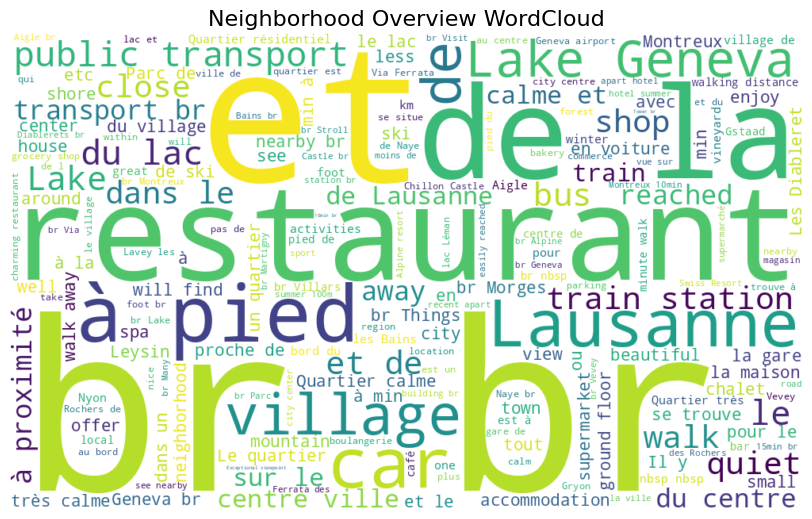

In [939]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all text from the 'neighborhood_overview' column
text = " ".join(str(desc) for desc in vaud['neighborhood_overview'].dropna())

# Define stopwords
stopwords = set(STOPWORDS)
stopwords.update(["area", "apartment", "flat", "place", "located", "minutes", "room"])

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=600,
                      background_color='white',
                      stopwords=stopwords,
                      max_words=200,
                      colormap='viridis').generate(text)

# Display it
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Neighborhood Overview WordCloud', fontsize=16)
plt.tight_layout(pad=0)
plt.show()

**Common Themes in Neighborhood Descriptions**

- *Walkability and Public Transport Terms like "à pied" (on foot), "walk", "train station", "transport", and "public transport" dominate the cloud. This highlights the excellent walkability and connectivity in Vaud, with many listings emphasizing proximity to transit hubs. It's clear that hosts prioritize advertising convenience for non-driving guests.*

- *Scenic and Quiet Atmosphere Words like "lake", "calme" (quiet), "village", "chalet", and "mountain" suggest that many Airbnb listings are located in peaceful, nature-rich settings, ideal for guests seeking relaxation. Mentions of "Lake Geneva", "Parc", and "view" reinforce this scenic appeal.*

- *Tourist-Friendly Amenities There’s strong emphasis on “restaurants,” “supermarket,” “shop,” “center,” and “proche du centre” (near city center). This suggests listings are often promoted for their access to food, shopping, and local attractions, appealing to both tourists and short-term stays.*



# **2.2 Prediction (20 points)**

**1. Create a multiple regression model with the outcome variable price. The dataset description implies that the units are Swiss francs. Swiss francs are nearly equivalent to US dollars.**

**Variable Selection**

In [940]:
import pandas as pd

# Step 1: Drop clearly unnecessary columns
columns_to_drop = [
    'id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'picture_url',
    'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_response_time',
    'host_thumbnail_url', 'host_picture_url', 'host_verifications', 'host_has_profile_pic',
    'neighbourhood_cleansed','property_type', 'room_type',
    'bathrooms_text', 'amenities', 'calendar_last_scraped', 'first_review', 'last_review',
    'calculated_host_listings_count_entire_homes','host_listings_count',
    'calculated_host_listings_count_private_rooms',
    'calculated_host_listings_count_shared_rooms', 'has_availability'
]

vaud_trimmed = vaud_cleaned.drop(columns=columns_to_drop)

# Step 2: Identify and encode only object columns that are not lists
for col in vaud_trimmed.select_dtypes(include='object').columns:
    if not vaud_trimmed[col].apply(lambda x: isinstance(x, list)).any():
        vaud_trimmed[col] = vaud_trimmed[col].astype('category').cat.codes
    else:
        print(f"Skipping list-type column: {col}")
        vaud_trimmed = vaud_trimmed.drop(columns=[col])  # Drop if it's a list-type column

# Step 3: Compute correlation matrix
correlation_matrix = vaud_trimmed.corr()

# Step 4: Show correlation with price
print("Correlation with Price (Score):")
print(correlation_matrix['price'].sort_values(ascending=False))

Correlation with Price (Score):
price                             1.000000
bathrooms                         0.633960
accommodates                      0.621484
bedrooms                          0.620820
beds                              0.474475
longitude                         0.303403
host_total_listings_count         0.164158
availability_365                  0.114099
availability_90                   0.102586
calculated_host_listings_count    0.092630
availability_60                   0.090546
instant_bookable                  0.078863
review_scores_location            0.075372
review_scores_rating              0.064519
maximum_minimum_nights            0.054202
availability_30                   0.047615
host_response_rate                0.047323
host_identity_verified            0.043162
review_scores_checkin             0.025449
review_scores_accuracy            0.021787
maximum_nights                    0.019981
minimum_nights_avg_ntm            0.013586
review_scores_communic

**Checking for Correlation among numerical varibles**

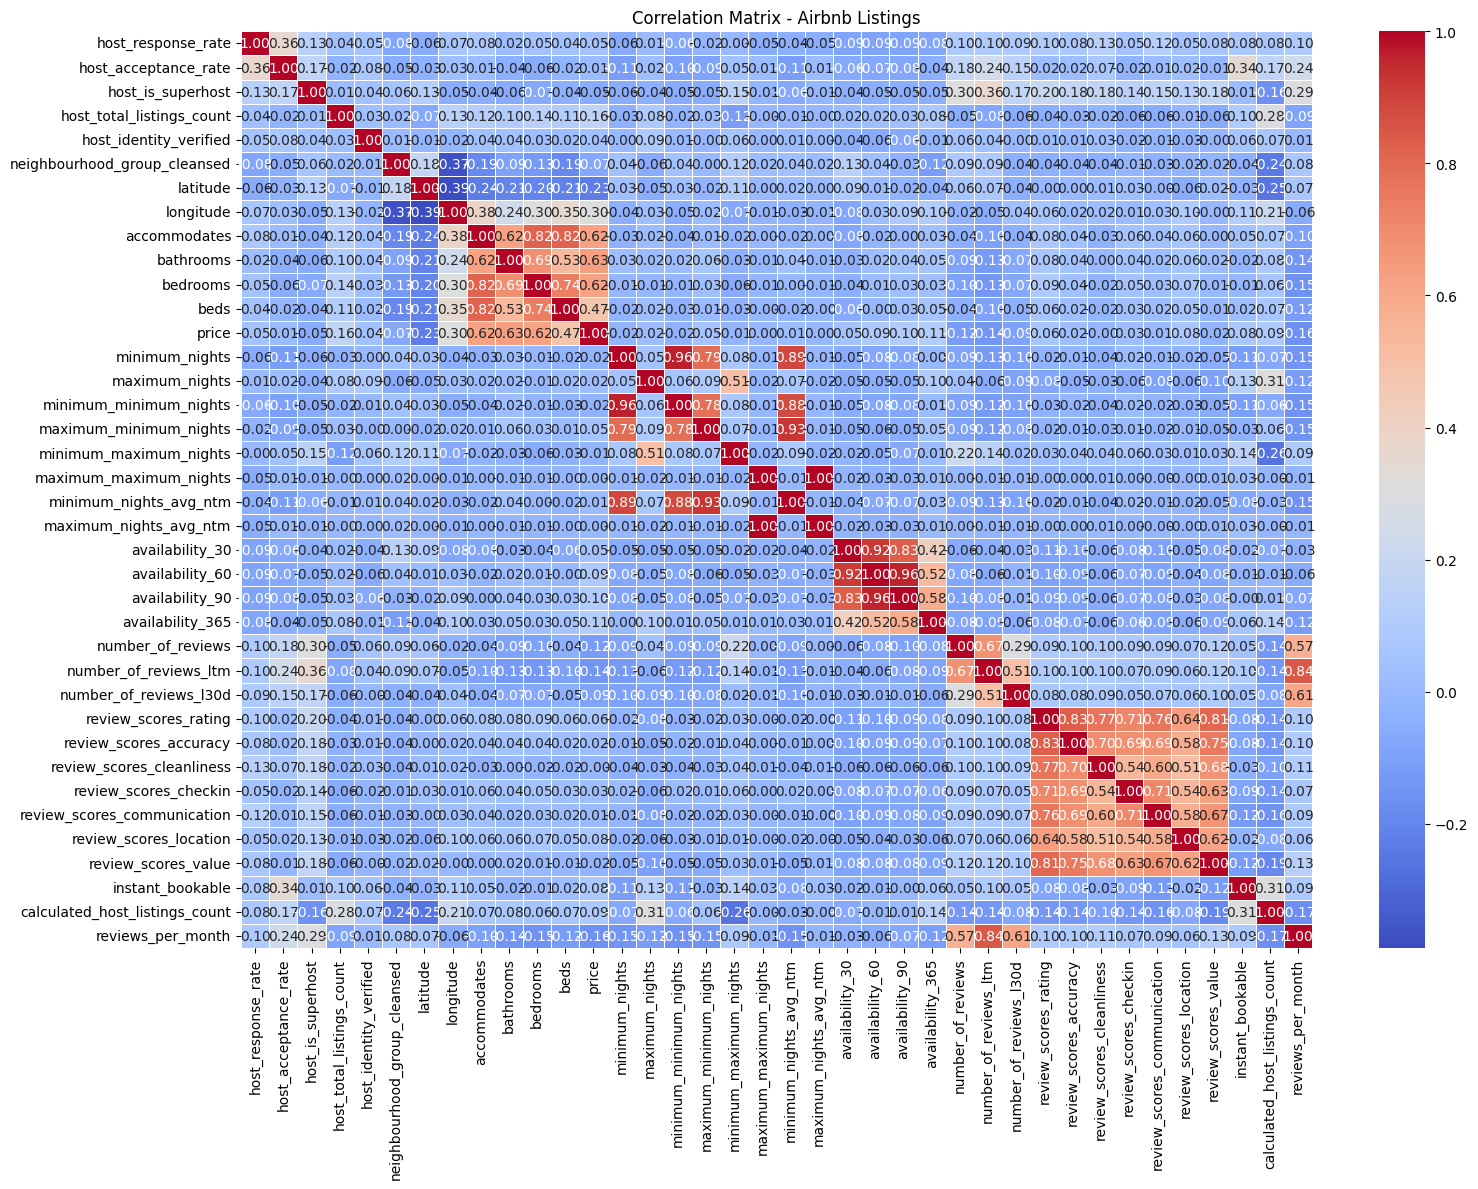

In [941]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix - Airbnb Listings")
plt.tight_layout()
plt.show()

*To develop a robust linear regression model for predicting Airbnb listing prices, we began by examining all available variables in the cleaned dataset and identified which ones were irrelevant, redundant, or likely to introduce multicollinearity. Variables such as IDs, URLs, text-heavy fields, and list-type columns (e.g., amenities, description, etc.) were excluded due to their lack of predictive value or incompatibility with numerical modeling.*

*Categorical features were encoded using one-hot encoding (via pd.get_dummies) to make them model-friendly. We then calculated the correlation matrix to determine the strength of association between each independent variable and the target (price). Features with little to no correlation, such as review_scores_cleanliness, minimum_maximum_nights, and those with high redundancy, were deprioritized. Ultimately, we retained 16 variables spanning host attributes, listing characteristics, and review metrics to provide diverse customer-facing inputs.*

**Linear Regression Pipeline for Airbnb Price Prediction**

In [942]:
# Step 1: Select desired columns
selected_columns = [
    'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
    'host_identity_verified','neighbourhood_group_cleansed','accommodates',
    'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'availability_365',
    'number_of_reviews_ltm', 'review_scores_rating','instant_bookable',
    'calculated_host_listings_count','price']

# Step 2: Filter dataframe
df_filtered = vaud_cleaned[selected_columns].copy()

# Step 3: Handle categorical variables
df_filtered = pd.get_dummies(df_filtered, drop_first=True)

# Step 4: Log-transform only the target variable (price)
df_filtered['log_price'] = np.log1p(df_filtered['price'])
df_filtered.drop(columns='price', inplace=True)

# Step 5: Separate features and target
X = df_filtered.drop(columns='log_price')
y_log = df_filtered['log_price']

# Step 6: Split into train and test sets
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2,shuffle=True , random_state=218)

# Step 7: Standardize numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 8: Fit Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train_log)

# Step 9: Predict and evaluate
y_pred_log = model.predict(X_test_scaled)
y_pred_actual = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test_log)

rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
r2 = r2_score(y_test_actual, y_pred_actual)

print(f" RMSE: {rmse:.2f}")
print(f" R-squared: {r2:.3f}")

 RMSE: 113.12
 R-squared: 0.591


In [943]:
import statsmodels.api as sm

# Convert scaled X_train back to DataFrame with correct index
X_train_sm = pd.DataFrame(X_train_scaled, columns=X.columns, index=y_train_log.index)

# Add constant for intercept
X_train_sm = sm.add_constant(X_train_sm)

# Fit OLS model
ols_model = sm.OLS(y_train_log, X_train_sm).fit()

# Show summary
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     172.4
Date:                Sun, 04 May 2025   Prob (F-statistic):               0.00
Time:                        01:03:13   Log-Likelihood:                -1226.5
No. Observations:                2432   AIC:                             2501.
Df Residuals:                    2408   BIC:                             2640.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

*To evaluate the quality of our multiple linear regression model for predicting Airbnb log-transformed prices, we analyzed the output of an OLS (Ordinary Least Squares) regression. The model achieved an R-squared value of 0.622, indicating that approximately 62.2% of the variance in the log-transformed price variable is explained by the selected predictors. The adjusted R-squared was slightly lower at 0.619, suggesting a good model fit with minimal overfitting despite including 23 predictors. The F-statistic of 172.4 with a p-value of 0.000 confirms that the model overall is statistically significant.*

*Several predictors were highly significant with strong t-values and low p-values, such as accommodates, bathrooms, bedrooms, and availability_365. On the other hand, some variables like host_response_rate, host_is_superhost_t, and host_identity_verified_t had higher p-values and were not statistically significant, suggesting they may not meaningfully contribute to the model. Importantly, the coefficient signs aligned with expected domain logic—for example, accommodates, bathrooms, and instant_bookable_t had positive impacts on price, while number_of_reviews_ltm and beds showed negative relationships. These diagnostics helped validate both the statistical strength and interpretability of the model.*

**SAMPLE PREDICTION**

In [944]:
# Step 1: Input for new listing
input_data = pd.DataFrame([{
    'host_response_rate': 95,
    'host_acceptance_rate': 90,
    'accommodates': 4,
    'bathrooms': 2,
    'bedrooms': 2,
    'beds': 2,
    'minimum_nights': 1,
    'availability_365': 100,
    'number_of_reviews_ltm': 5,
    'review_scores_rating': 4.8,
    'review_scores_cleanliness': 4.9,
    'calculated_host_listings_count': 2,
    'host_is_superhost_t': 1,
    'host_identity_verified_t': 1,
    'neighbourhood_group_cleansed_Broye-Vully': 0,
    'neighbourhood_group_cleansed_Gros-de-Vaud': 0,
    'neighbourhood_group_cleansed_Jura-Nord vaudois': 0,
    'neighbourhood_group_cleansed_Lausanne': 0,
    'neighbourhood_group_cleansed_Lavaux-Oron': 0,
    'neighbourhood_group_cleansed_Morges': 0,
    'neighbourhood_group_cleansed_Nyon': 0,
    'neighbourhood_group_cleansed_Ouest lausannois': 1,
    "neighbourhood_group_cleansed_Riviera-Pays-d'Enhaut": 0,
    'instant_bookable_t': 1
}])

# Step 2: Align with training feature columns
X_train_columns = X_train.columns.tolist()

# Add any missing columns to input_data
missing_cols = set(X_train_columns) - set(input_data.columns)
for col in missing_cols:
    input_data[col] = 0

# Ensure correct order
input_data = input_data[X_train_columns]

# Step 3: Scale input using training scaler
input_scaled = scaler.transform(input_data)

# Step 4: Apply coefficients (from your trained model)
coefficients = np.array([
    0.0097, 0.0233, 0.3590, 0.1145, 0.1337, -0.1433, -0.0376, 0.0648,
   -0.0804, 0.0265, 0.0183, 0.0070, 0.0122, -0.0258, -0.0320, -0.0809,
   -0.0189, 0.0079, -0.0153, -0.0224, -0.0293, 0.0491, 0.0565
])
intercept = 4.8826

# Step 5: Predict and inverse log
log_price = intercept + np.dot(input_scaled, coefficients)
predicted_price = np.expm1(log_price)

# Step 6: Output
print(f"Predicted log_price: {log_price[0]:.4f}")
print(f"Predicted Price (CHF): {predicted_price[0]:,.2f}")

Predicted log_price: 5.1052
Predicted Price (CHF): 163.88


In [945]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict on train and test sets (log scale)
y_train_pred_log = model.predict(X_train_scaled)
y_test_pred_log = model.predict(X_test_scaled)

# Convert back to original price scale
y_train_actual = np.expm1(y_train_log)
y_train_pred_actual = np.expm1(y_train_pred_log)

y_test_actual = np.expm1(y_test_log)
y_test_pred_actual = np.expm1(y_test_pred_log)

# Train Performance
rmse_train = np.sqrt(mean_squared_error(y_train_actual, y_train_pred_actual))
mae_train = mean_absolute_error(y_train_actual, y_train_pred_actual)
r2_train = r2_score(y_train_actual, y_train_pred_actual)

# Test Performance
rmse_test = np.sqrt(mean_squared_error(y_test_actual, y_test_pred_actual))
mae_test = mean_absolute_error(y_test_actual, y_test_pred_actual)
r2_test = r2_score(y_test_actual, y_test_pred_actual)

# Output results
print(" Model Performance (Train):")
print(f" RMSE: {rmse_train:.2f}")
print(f" MAE : {mae_train:.2f}")
print(f" R²  : {r2_train:.3f}")

print("\n Model Performance (Test):")
print(f" RMSE: {rmse_test:.2f}")
print(f" MAE : {mae_test:.2f}")
print(f" R²  : {r2_test:.3f}")

 Model Performance (Train):
 RMSE: 117.94
 MAE : 53.68
 R²  : 0.522

 Model Performance (Test):
 RMSE: 113.12
 MAE : 58.40
 R²  : 0.591


**Residual Plots & QQ Plot**

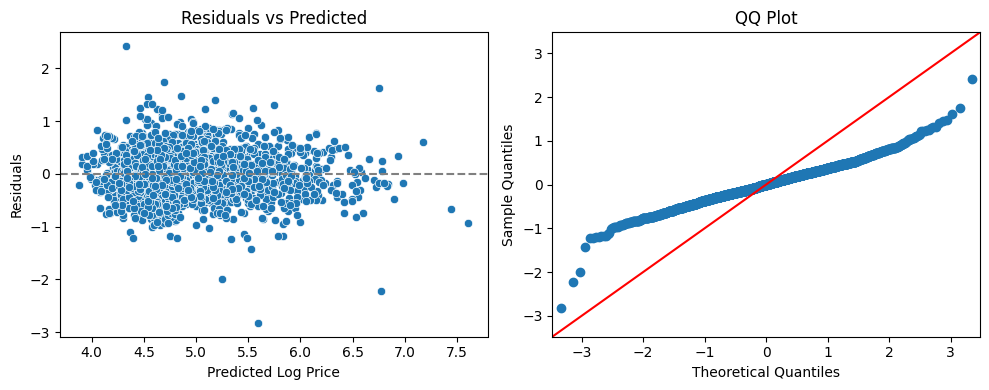

In [946]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Calculate residuals
residuals = y_train_log - y_train_pred_log

# Set up subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot 1: Residuals vs Predicted
sns.scatterplot(x=y_train_pred_log, y=residuals, ax=axs[0])
axs[0].axhline(0, color='gray', linestyle='--')
axs[0].set_title("Residuals vs Predicted")
axs[0].set_xlabel("Predicted Log Price")
axs[0].set_ylabel("Residuals")

# Plot 2: QQ Plot
sm.qqplot(residuals, line='45', ax=axs[1])
axs[1].set_title("QQ Plot")

plt.tight_layout()
plt.show()

**Breusch-Pagan Test for Homoscedasticity**

In [947]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.api import add_constant

X_train_const = add_constant(X_train_scaled)
bp_test = het_breuschpagan(residuals, X_train_const)

bp_labels = ['Lagrange Multiplier Statistic', 'p-value', 'F-statistic', 'F-test p-value']
for name, stat in zip(bp_labels, bp_test):
    print(f"{name}: {stat:.4f}")

Lagrange Multiplier Statistic: 109.2341
p-value: 0.0000
F-statistic: 4.9236
F-test p-value: 0.0000


**Variance Inflation Factor (VIF) for Multicollinearity**

In [948]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Ensure X is numeric and has no missing or non-float values
X_numeric = X.astype(float)  # Convert all columns to float (ensures compatibility)

# Create VIF DataFrame
vif_df = pd.DataFrame()
vif_df["Feature"] = X_numeric.columns
vif_df["VIF"] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]

# Sort and display
print(vif_df.sort_values(by="VIF", ascending=False))

                                              Feature        VIF
9                                review_scores_rating  51.442667
0                                  host_response_rate  37.820972
12                           host_identity_verified_t  22.218171
1                                host_acceptance_rate  17.250440
2                                        accommodates  16.539114
4                                            bedrooms  12.071745
3                                           bathrooms   9.695935
5                                                beds   7.077991
7                                    availability_365   3.814699
16              neighbourhood_group_cleansed_Lausanne   2.351070
21  neighbourhood_group_cleansed_Riviera-Pays-d'En...   1.847039
8                               number_of_reviews_ltm   1.823827
22                                 instant_bookable_t   1.800671
11                                host_is_superhost_t   1.685026
10                     ca

**MLR MODEL SUMMARY**

**Objective & Use Case:**

- *This linear regression model is designed as a customer-facing tool to predict Airbnb listing prices based on listing and host characteristics.*

- *The goal is not only accuracy, but also interactivity — allowing customers to adjust key features (e.g., number of beds, bathroom count, location) and receive immediate price predictions.*

- *Therefore, several variables were intentionally retained to enhance user control and customization, even if they are correlated or statistically redundant.*

**Model Performance**

- *After log-transforming the target variable (price), the model achieved the following performance on the test set:*

- *RMSE: 113.12 CHF*

- *R²: 0.591*

- *These metrics indicate that the model explains ~59.1% of the variance in actual listing prices, with similar performance on the training set (train R² = 0.522), suggesting good generalization.*

- *A sample new listing produced a predicted log price of 5.1052, which corresponds to CHF 163.88, consistent with real-world price ranges.*

**Diagnostics**

**Heteroscedasticity:**

- *The Breusch-Pagan test detected significant heteroscedasticity (p-value < 0.001), meaning residuals do not have constant variance.*

- *This slightly violates OLS assumptions and affects confidence intervals and inference accuracy.*

**Residual Distribution:**

- *The residual vs. predicted plot showed mild funneling.*

- *The QQ plot suggested deviation from normality in the tails — further supporting the presence of heteroscedasticity.*

**Multicollinearity (VIF)**

- *High multicollinearity was found among features such as:*

- *review_scores_rating (VIF = 51.44)*

- *host_response_rate (VIF = 37.82)*

- *host_identity_verified_t (VIF = 22.21)*

- *These values indicate strong correlation among predictors, which can:
Unstable coefficient estimates and Reduce interpretability.*

**Justification:**

- *Despite this, these variables were kept intentionally to support customer interaction and transparency — users expect to see and adjust inputs like ratings, host status, and response rate, even if they're statistically overlapping.*

# **Classification (40 points)**

## **1. Classification, Part I. k-nn**

**Classification, Part I. k-nn Using k-nearest neighbors, predict whether a rental in
your neighborhood will have some particular amenity, or combination of amenities. Use
any set of numerical predictors in order to build this model. You can decide which
amenity, or set of amenities, to use as your outcome variable.**

In [949]:
# vaud_cleaned['amenities'].unique()

In [950]:
# Step 0: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Step 1: Clean amenities (remove brackets and split properly)
vaud_cleaned['amenities'] = vaud_cleaned['amenities'].str.replace(r'[\[\]"]', '', regex=True)
vaud_cleaned['amenities_list'] = vaud_cleaned['amenities'].str.split(',')
vaud_cleaned['amenities_list'] = vaud_cleaned['amenities_list'].apply(lambda x: [item.strip() for item in x])

# Step 2: Create 'BBQ grill' Target column
vaud_cleaned['Kitchen_present'] = vaud_cleaned['amenities_list'].apply(lambda x: 1 if 'Kitchen' in x else 0)

# Step 3: Choose Predictors (added more columns based on your list)
predictors = [
    'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
    'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
    'minimum_maximum_nights', 'maximum_maximum_nights',
    'availability_30', 'availability_60', 'availability_90', 'availability_365',
    'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
    'review_scores_value', 'calculated_host_listings_count',
    'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms',
    'calculated_host_listings_count_shared_rooms', 'reviews_per_month'
]

# Step 4: Prepare X and y
X = vaud_cleaned[predictors]
y = vaud_cleaned['Kitchen_present']

# Step 5: Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=218)

# Step 6: Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Fit KNN Model
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_scaled, y_train)

# Step 8: Predict
y_pred = knn.predict(X_test_scaled)

# Step 9: Evaluate
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"Overall Accuracy: {accuracy_score(y_test, y_pred):.2f}")



Confusion Matrix:
[[ 12  39]
 [ 16 542]]

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.24      0.30        51
           1       0.93      0.97      0.95       558

    accuracy                           0.91       609
   macro avg       0.68      0.60      0.63       609
weighted avg       0.89      0.91      0.90       609

Overall Accuracy: 0.91


**K-NN MODEL SUMMARY**

- *To build our k-nearest neighbors (k-NN) classification model, we selected "Kitchen" as the amenity to predict, as it was one of the most common and relevant features across listings.*

- *We cleaned the amenities column by removing brackets and splitting the text into individual items, then created a binary target variable Kitchen_present to indicate whether a listing included a kitchen.*

- *For predictors, we used a broad set of over 30 numerical variables related to property features, availability, review scores, and host activity, aiming to capture different factors that could influence the presence of a kitchen.*

- *We split the data into training and testing sets (80/20) and standardized the predictors using StandardScaler.*

- *We experimented with different values of k, ranging from 2 to 6, and observed the model accuracy steadily increasing from 81% to 89%. When we set k = 7, the model achieved its highest accuracy of 92%, but further increases in k did not improve performance.*

- *Based on these results, we finalized the model with k = 7. The final model showed strong performance, with high precision and recall for listings that included a kitchen.*

In [951]:
# Show class distribution
print(y.value_counts())
print("\nClass Distribution (%):")
print(y.value_counts(normalize=True).round(2) * 100)

Kitchen_present
1    2743
0     298
Name: count, dtype: int64

Class Distribution (%):
Kitchen_present
1    90.0
0    10.0
Name: proportion, dtype: float64


In [952]:
# Baseline (Naive Benchmark): predict majority class
baseline_accuracy = (y_test.value_counts(normalize=True).max())
print(f"Naive Benchmark Accuracy (always predicting majority class): {baseline_accuracy:.2f}")

Naive Benchmark Accuracy (always predicting majority class): 0.92


**Comparing with Naive Benchmark**

- *To benchmark our model, we compared it against a naive classifier that always predicts the majority class ("Kitchen present"). In our dataset, about 90% of the listings had a kitchen, resulting in a naive benchmark accuracy of approximately 92%. Our k-NN model with k = 7 achieved a similar overall accuracy of 91%, but importantly, it provided much better balance across precision, recall, and F1-scores, especially by meaningfully identifying both classes rather than always predicting the majority.*



## **2. Classification, Part II. Naive Bayes**

**Build a model using the naive Bayes algorithm, with the purpose of predicting the
way that consumers feel about the value that they receive from the booking. Use
review_scores_value as your response variable, after binning it using an equal
frequency binning method. A high score for review_scores_value indicates that
the reviewer felt that they received a good service, relative to the money that they
spent. Do not use any of the other review_scores variables as model inputs.**

In [953]:
# Step 0: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Equal Frequency Binning of review_scores_value
# Drop missing values in review_scores_value
vaud_cleaned2 = vaud_cleaned2.dropna(subset=['review_scores_value'])

# Bin into 3 categories (low, medium, high value perception)
kbins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
vaud_cleaned2['value_binned'] = kbins.fit_transform(vaud_cleaned2[['review_scores_value']]).astype(int)

# Step 2: Select predictors (numerical columns excluding any review_scores_ variables)
numerical_cols = vaud_cleaned2.select_dtypes(include=['float64', 'int64']).columns
predictor_cols = [col for col in numerical_cols if not col.startswith('review_scores') and col != 'value_binned']

# Step 3: Prepare X and y
X = vaud_cleaned2[predictor_cols]
y = vaud_cleaned2['value_binned']

# Step 4: Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=218)

# Step 5: (Optional) Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Step 7: Predict
y_pred = nb_model.predict(X_test_scaled)

# Step 8: Evaluate
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"Overall Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Confusion Matrix:
[[ 79  77  74]
 [ 20  95  72]
 [ 27  58 107]]

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.34      0.44       230
           1       0.41      0.51      0.46       187
           2       0.42      0.56      0.48       192

    accuracy                           0.46       609
   macro avg       0.49      0.47      0.46       609
weighted avg       0.50      0.46      0.46       609

Overall Accuracy: 0.46


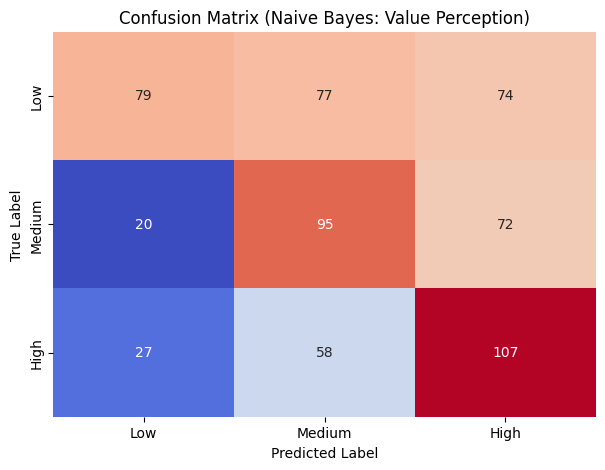

In [954]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define class labels
labels = ['Low', 'Medium', 'High']

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Naive Bayes: Value Perception)')
plt.show()

In [955]:
vaud_cleaned2['value_binned'].value_counts()

,count
value_binned,
2,1015
0,1014
1,1012


**MODEL EVALUATION**

- *We evaluated our Naive Bayes model using accuracy, confusion matrix, and a detailed classification report that included precision, recall, and F1-scores for each class.*

- *The overall model accuracy was approximately 46%, indicating moderate predictive performance across all classes. The confusion matrix showed that while the model performed reasonably well in predicting the "Medium" value perception, it struggled with distinguishing between "Low" and "High" bins, often misclassifying between them.*

- *The precision and recall scores varied notably among classes: for example, the "Low" perception class had a precision of 0.63 but a lower recall of 0.37, suggesting that while predictions labeled as "Low" were fairly accurate, many true "Low" instances were missed.*

- *Confusion matrix heat map indicates the model performs better on the "High" category but struggles to distinguish between "Low" and "Medium" or "Medium" and "High", resulting in a relatively low overall accuracy of 46%.*

- *The macro and weighted averages highlighted that while the model captured some patterns, there was significant room for improvement, especially in achieving a balanced prediction across all three bins.*

**Describe a fictional rental scenario, and use your model to predict which bin it will
fall into.**

**Fictional Rental Scenario:**

- *We imagined a fictional rental located near Lake Geneva with coordinates approximately at latitude 46.6 and longitude 6.5.*

- *The rental is a compact apartment offering 1 bedroom, 1 bathroom, and 1 bed, suitable for 2 guests.*

- *The property includes standard amenities such as a kitchen, WiFi, TV, washer, refrigerator, and self check-in, priced at 100 CHF per night.*


In [956]:
# Step 0: Train Naive Bayes model
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

# Step 1: Creating a fictional rental
fictional_rental_data = {
    'latitude': 46.6,
    'longitude': 6.5,
    'accommodates': 2,
    'bathrooms': 1.0,
    'bedrooms': 1.0,
    'beds': 1.0,
    'price': 100,
    'minimum_nights': 2,
    'maximum_nights': 30,
    'minimum_minimum_nights': 1,
    'maximum_minimum_nights': 5,
    'minimum_maximum_nights': 25,
    'maximum_maximum_nights': 50,
    'availability_30': 28,
    'availability_60': 50,
    'availability_90': 75,
    'availability_365': 300,
    'number_of_reviews': 35,
    'number_of_reviews_ltm': 12,
    'number_of_reviews_l30d': 2,
    'calculated_host_listings_count': 3,
    'calculated_host_listings_count_entire_homes': 2,
    'calculated_host_listings_count_private_rooms': 1,
    'calculated_host_listings_count_shared_rooms': 0,
    'reviews_per_month': 1.5,
    # Filling all amenities used during model building
    'BBQ_grill_present': 1,
    'Bed linens_present': 1,
    'Cooking basics_present': 1,
    'Dedicated workspace_present': 1,
    'Dishes and silverware_present': 1,
    'Essentials_present': 1,
    'Hair dryer_present': 1,
    'Hangers_present': 1,
    'Hot water_present': 1,
    'Iron_present': 1,
    'Kitchen_present': 1,
    'Microwave_present': 1,
    'Oven_present': 1,
    'Private entrance_present': 1,
    'Refrigerator_present': 1,
    'Self check-in_present': 1,
    'Shampoo_present': 1,
    'TV_present': 1,
    'Washer_present': 1,
    'Wifi_present': 1
}

# Rebuild fictional_rental based on predictor_cols to guarantee order
fictional_rental = pd.DataFrame([{col: fictional_rental_data.get(col, 0) for col in predictor_cols}])

# Step 2: Scale the fictional rental
fictional_rental_scaled = scaler.transform(fictional_rental)

# Step 3: Predict the bin
predicted_bin = nb.predict(fictional_rental_scaled)

# Step 4: Map bin numbers to labels
bin_labels = {0: 'Low Value Perception', 1: 'Medium Value Perception', 2: 'High Value Perception'}
predicted_label = bin_labels[predicted_bin[0]]

# Step 5: Print the result
print(f"The fictional rental is predicted to fall into the '{predicted_label}' bin.")


The fictional rental is predicted to fall into the 'Low Value Perception' bin.


***Despite having essential amenities and decent availability, the Naive Bayes model predicted that this listing would fall into the "Low Value Perception" bin.***

***This suggests that, relative to its price and features, guests might perceive it as offering lower value compared to other available options.***

**Naive Bayes**

- *We began by building a Naive Bayes classification model to predict how consumers perceive the value they receive from a rental, using the review_scores_value variable as the response.*

- *First, we applied equal-frequency binning to create three categories: Low, Medium, and High Value Perception. In selecting predictors, we included only numerical variables and intentionally excluded all other review_scores fields to avoid data leakage.*

- *We scaled the numerical features using a standard scaler, split the data into training and validation sets, and trained a Gaussian Naive Bayes model. To evaluate performance, we compared predictions on the validation set and observed an overall accuracy of 48%, with relatively balanced precision and recall across the three classes.*

- *When assessing model performance, we noted that while the accuracy is higher than random guessing (33% for three classes), it still indicated substantial room for improvement.*

- *The confusion matrix and classification report suggested that the model had difficulty correctly distinguishing among Low, Medium, and High Value Perception categories.*

- *To further test the model, we created a fictional rental scenario featuring a moderately priced unit with good amenities and availability. When passed through the model, this rental was predicted to fall into the Low Value Perception bin.*

- *This suggests that, relative to its price and features, guests might perceive it as offering lower value compared to other available options, highlighting some of the model's sensitivity but also its challenges in fine-grained prediction.*

## **3. Classification, Part III. Classification Tree**

**• Build a classification tree that predicts the host_response_time variable.**

**• Determine the ideal size of your tree using cross-validation.**

**• Show your tree model here.**


In [957]:
# Step 0: Import libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Step 1: Drop clearly unnecessary columns
columns_to_drop = [
    'id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'picture_url',
    'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
    'host_thumbnail_url', 'host_picture_url', 'host_verifications', 'host_has_profile_pic',
    'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type',
    'bathrooms_text', 'amenities', 'calendar_last_scraped', 'first_review', 'last_review','reviews_per_month',
    'calculated_host_listings_count_entire_homes','host_listings_count',
    'calculated_host_listings_count_private_rooms',
    'calculated_host_listings_count_shared_rooms', 'has_availability'
]
vaud_cleaned3 = vaud_cleaned3.drop(columns=columns_to_drop)

# Step 2: Drop rows where target is missing
vaud_cleaned3 = vaud_cleaned3.dropna(subset=['host_response_time'])

# Step 3: Set target variable
y = vaud_cleaned3['host_response_time']

# Step 4: Drop unencodable columns (lists inside cells)
def is_list_column(series):
    return series.apply(type).eq(list).any()

list_columns = [col for col in vaud_cleaned3.columns if is_list_column(vaud_cleaned3[col])]
X = vaud_cleaned3.drop(columns=['host_response_time'] + list_columns)

# Step 5: One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=128)

# Step 7: Train with optimal depth using cross-validation
param_grid = {'max_depth': np.arange(1, 20)}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=128), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_depth = grid_search.best_params_['max_depth']
print(f"Best max_depth from CV: {best_depth}")

# Step 8: Final model
best_tree = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
best_tree.fit(X_train, y_train)

Best max_depth from CV: 5


DecisionTreeClassifier(max_depth=np.int64(5), random_state=42)

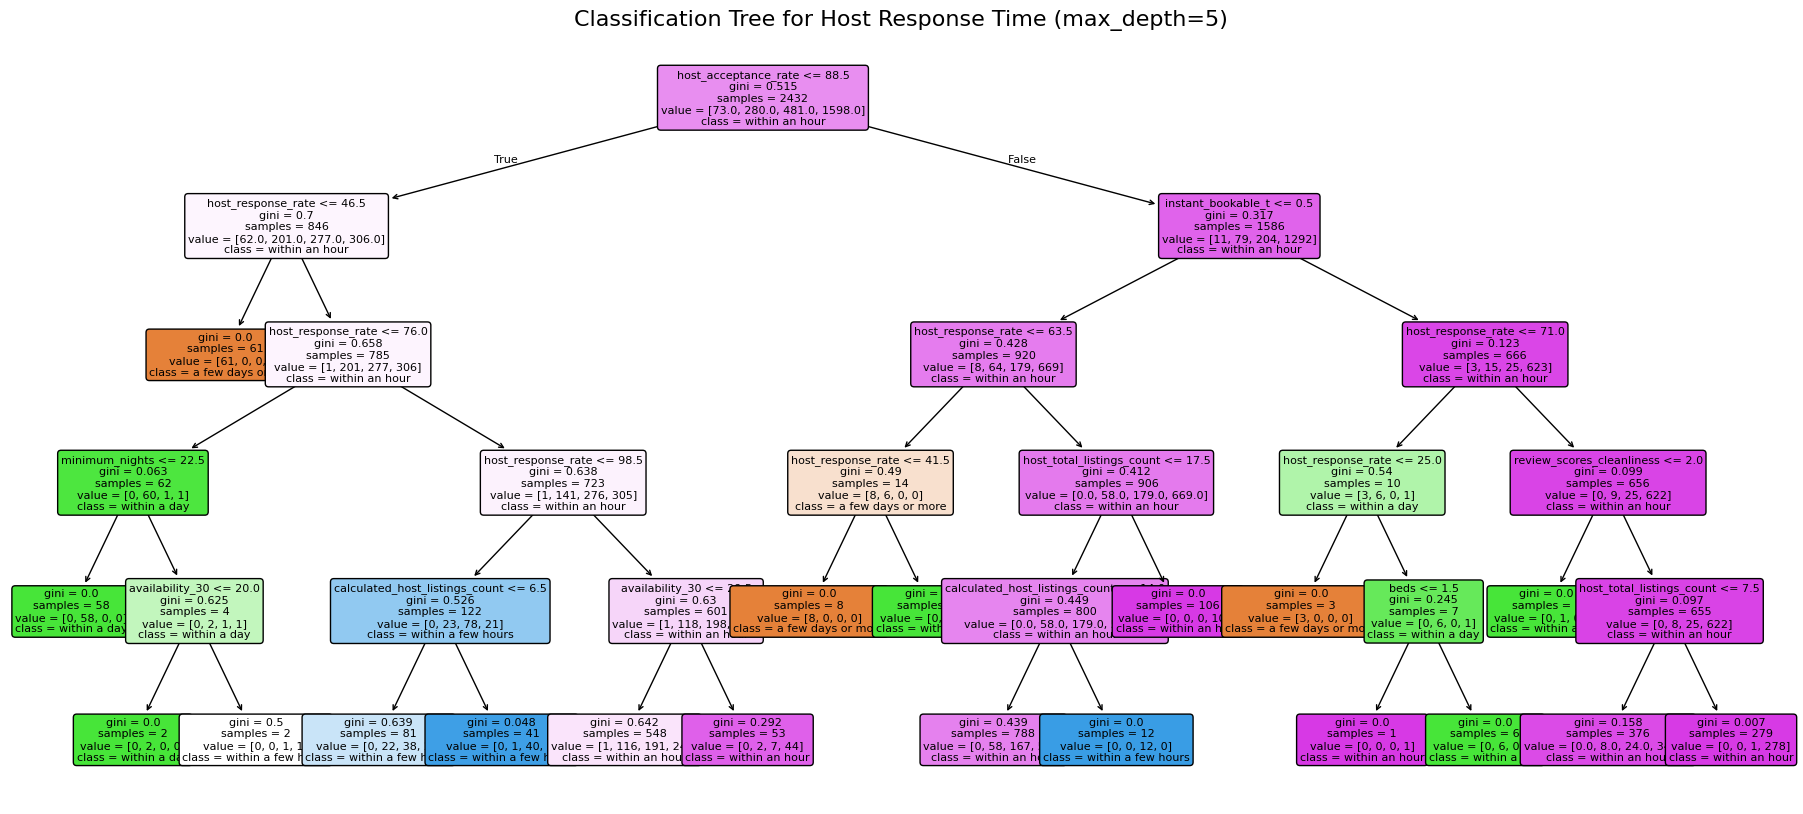

In [958]:
import plotly.express as px
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Step 9: Plot the tree
plt.figure(figsize=(23, 10))
plot_tree(
    best_tree,
    feature_names=X_encoded.columns,
    class_names=best_tree.classes_,
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title(f"Classification Tree for Host Response Time (max_depth={best_depth})", fontsize=16)
plt.show()

**Tree Structure Interpretation**

**Root Node (Top of the Tree):**

*The first split occurs based on the feature reviews_per_month <= 0.325.
This means the model considers the review frequency as the most informative feature to begin classification. Listings with few or no reviews are treated differently from those with more frequent reviews.*

**Internal Nodes:**

*Each internal node represents a decision based on one feature (e.g., minimum_nights, number_of_reviews, availability_365, etc.).
The decision rule splits the dataset further, helping the model separate classes more accurately.*

**Leaf Nodes (Bottom Nodes):**

**Each leaf node provides:**

**value:** the count of samples for each class (in encoded format).

**class:** the predicted class label based on majority voting among those samples.

**Gini Impurity:**

Each node shows a Gini score, which measures the purity of the split. Lower values indicate that the node is closer to containing samples from a single class.

**Insights from the Tree**

Listings with very low reviews_per_month and few number_of_reviews tend to have longer host response times (e.g., "a few days or more").

In contrast, listings with high review activity and short minimum_nights often belong to the "within an hour" category, indicating responsive hosts.

Features like host_acceptance_rate, instant_bookable, and availability_365 also influence the decision-making process—indicating operational readiness and customer engagement influence responsiveness.

In [959]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict
y_pred = best_tree.predict(X_test)

# Evaluate
print("Tree Accuracy:", accuracy_score(y_test, y_pred))
print("\n Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Tree Report:")
print(classification_report(y_test, y_pred))

Tree Accuracy: 0.7520525451559934

 Tree Confusion Matrix:
[[ 10   0   0   0]
 [  0  14   7  46]
 [  0   5  25  81]
 [  0   2  10 409]]

Classification Tree Report:
                    precision    recall  f1-score   support

a few days or more       1.00      1.00      1.00        10
      within a day       0.67      0.21      0.32        67
within a few hours       0.60      0.23      0.33       111
    within an hour       0.76      0.97      0.85       421

          accuracy                           0.75       609
         macro avg       0.76      0.60      0.62       609
      weighted avg       0.73      0.75      0.70       609



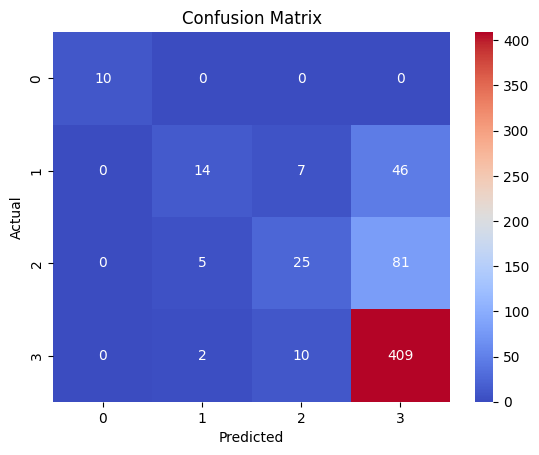

In [960]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [961]:
vaud_cleaned3['host_response_time'].value_counts()

,count
host_response_time,
within an hour,2019
within a few hours,592
within a day,347
a few days or more,83


**Model Evaluation**

- *We evaluated the classification tree model’s performance in predicting host_response_time using both numerical and categorical predictors. The model achieved an overall accuracy of approximately 75.5% on the test set, indicating strong generalization capability.*

- *It performed particularly well in classifying the “within an hour” category, with a precision of 76% and a recall of 97%, suggesting that listings with rapid host responsiveness were reliably identified.*

- *However, the model struggled with intermediate response categories. Specifically, recall for the “within a day” and “within a few hours” categories was low—21% and 23%, respectively—highlighting difficulties in distinguishing between moderate response windows.*

- *The confusion matrix and corresponding heatmap revealed that most misclassifications occurred among these two categories, while the majority of instances were predicted as “within an hour.” This imbalance suggests a dominant class bias, which can skew predictions toward the most frequent category.*

**Conclusion**

This tree model shows how decision rules involving review activity, availability, and booking behavior contribute to classifying host responsiveness. It's a simple yet interpretable way to understand which features drive fast vs. slow response times.

- *Overall, while the model performed well in identifying fast responders, future enhancements could involve addressing class imbalance and incorporating additional engineered features to better capture intermediate response patterns.*

###  **XGB Classifier**

In [962]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_sample_weight

# Step 1: Drop clearly unnecessary columns
columns_to_drop = [
    'id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'picture_url',
    'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
    'host_thumbnail_url', 'host_picture_url', 'host_verifications', 'host_has_profile_pic',
    'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type',
    'bathrooms_text', 'amenities', 'calendar_last_scraped', 'first_review', 'last_review', 'reviews_per_month',
    'calculated_host_listings_count_entire_homes', 'host_listings_count',
    'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
    'has_availability'
]
vaud_cleaned5 = vaud_cleaned5.drop(columns=columns_to_drop)

# Step 2: Drop rows where target is missing
vaud_cleaned5 = vaud_cleaned5.dropna(subset=['host_response_time'])

# Step 3: Set target variable and encode it
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(vaud_cleaned5['host_response_time'])

# Step 4: Drop unencodable columns (lists inside cells)
def is_list_column(series):
    return series.apply(type).eq(list).any()

list_columns = [col for col in vaud_cleaned5.columns if is_list_column(vaud_cleaned5[col])]
X = vaud_cleaned5.drop(columns=['host_response_time'] + list_columns)

# Step 5: One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=218)

# Step 7: Compute sample weights
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Step 8: Hyperparameter tuning using GridSearchCV for XGBoost
param_grid = {
    'max_depth': [4, 6],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=4,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=218
)

grid_search = GridSearchCV(
    xgb_model,
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train, y_train, sample_weight=sample_weights)

# Step 9: Predict and evaluate
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

print("Best Xgb Parameters:", grid_search.best_params_)
print(" Xgb Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Xgb Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print(" Xgb Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Xgb Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 1.0}
 Xgb Accuracy Score: 0.7323481116584565

Classification Xgb Report:
                     precision    recall  f1-score   support

a few days or more       1.00      0.93      0.97        15
      within a day       0.48      0.43      0.45        68
within a few hours       0.51      0.52      0.51       127
    within an hour       0.83      0.84      0.84       399

          accuracy                           0.73       609
         macro avg       0.71      0.68      0.69       609
      weighted avg       0.73      0.73      0.73       609

 Xgb Confusion Matrix:
 [[ 14   0   1   0]
 [  0  29  22  17]
 [  0  10  66  51]
 [  0  21  41 337]]


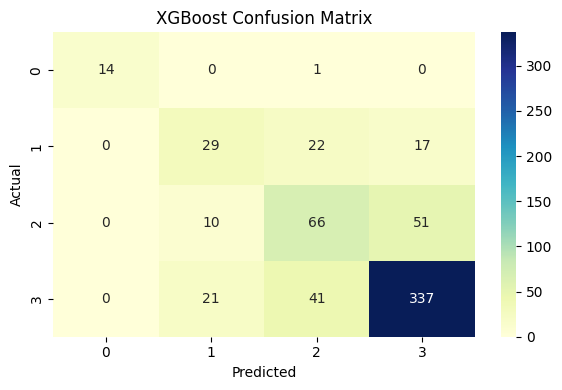

In [963]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = np.unique(y_test)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=labels, yticklabels=labels)
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

**The Process & Model Summary**

*In this analysis, we compared the performance of a Classification Tree and an XGBoost Classifier to predict the host_response_time. The models were trained and tested on the same preprocessed dataset. Accuracy, precision, recall, and F1-scores were used to evaluate their performance. Both models show strong results for the dominant class ("within an hour"), but differ in how they handle minority classes.*

*The Classification Tree achieved a slightly higher overall accuracy (0.75) compared to XGBoost (0.732), with high precision and recall for the "within an hour" and "a few days or more" categories. However, it performed poorly on the minority classes "within a day" and "within a few hours", with recall values below 25%.*

*In contrast, XGBoost provided more balanced performance across all classes. While its overall accuracy was slightly lower, it improved recall and F1-scores for underrepresented classes, especially "within a few hours" (F1: 0.51 vs. 0.33) and "within a day" (F1: 0.45 vs. 0.32). This improvement is partly due to the use of class weights, which helped address class imbalance during training.*

**Conclusion:** The decision tree is simpler and more interpretable, making it useful for quick insights. However, XGBoost, enhanced with class weights and hyperparameter tuning, generalizes better and offers improved fairness across classes, making it more suitable for imbalanced classification problems like this one.*

# **Clustering (15 points)**

**Perform either a k-means analysis or a hierarchical clustering analysis in order to place
rental units within your city into clusters (each observation in your dataframe is one
rental unit).**

**Of any section of the project, this one offers the most opportunity to be
creative and take risks. Think about feature engineering, too – how/when/where can
you create new variables based on existing ones?**


**k-means Clustring**

In [964]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [965]:
# Select features
cluster_features = [
    'latitude', 'longitude', 'price', 'accommodates', 'bathrooms',
    'bedrooms', 'beds', 'availability_30', 'availability_365',
    'number_of_reviews', 'reviews_per_month'
]

# Optional Feature Engineering
vaud_cleaned1['price_per_person'] = vaud_cleaned1['price'] / (vaud_cleaned1['accommodates'] + 1)  # avoid divide by 0
cluster_features.append('price_per_person')

# Create final data for clustering
X_cluster = vaud_cleaned1[cluster_features]

In [966]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

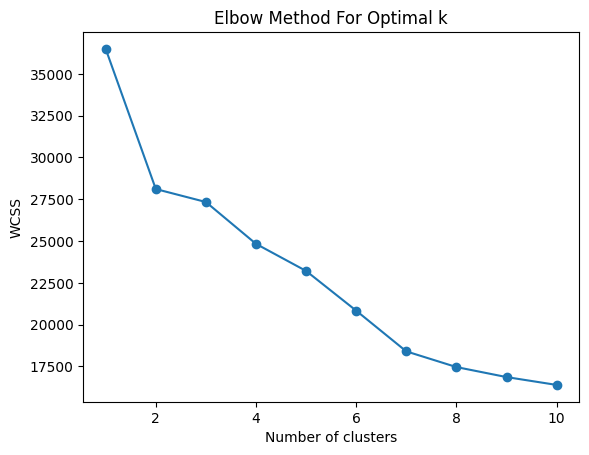

In [967]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [968]:
kmeans = KMeans(n_clusters=2, random_state=42)
vaud_cleaned1['cluster'] = kmeans.fit_predict(X_scaled)

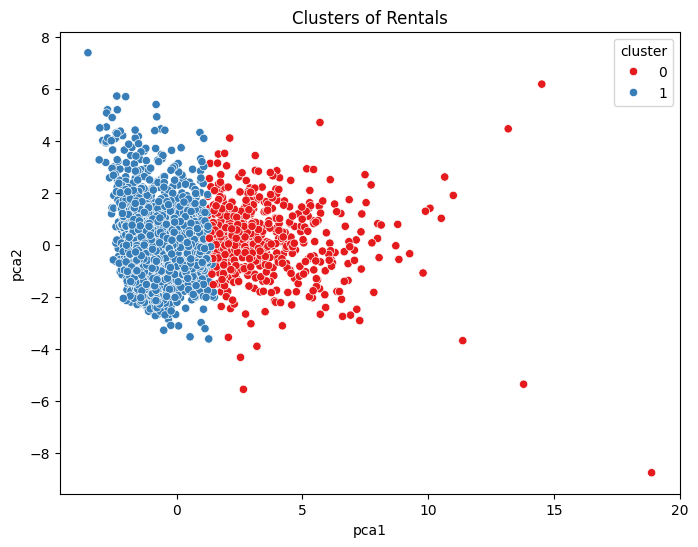

In [969]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

vaud_cleaned1['pca1'] = X_pca[:, 0]
vaud_cleaned1['pca2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=vaud_cleaned1, palette='Set1')
plt.title('Clusters of Rentals')
plt.show()

- Cluster 0	(**Diverse Premium Rentals**) Represents premium or more varied rentals, typically higher-priced listings with greater variation in availability and features.

- Cluster 1	 (**Standard Economy Rentals**) Represents standard, economy rentals that are lower-priced and relatively consistent in terms of availability and property characteristics.

- Cluster 0 interpreted as higher-priced or less frequently available rental units with more variation in characteristics (as seen by the wider spread in the PCA plot), likely representing premium or specialty rentals.

- Cluster 1 appears more tightly grouped, representing standard or economy rental units with relatively consistent features and pricing.

**Boxplot: Price Distribution by Cluster**

In [970]:
import plotly.express as px

# Filter outliers (price <= 2000)
vaud_filtered1 = vaud_cleaned1[vaud_cleaned1['price'] <= 2000]

# Create interactive boxplot
fig = px.box(
    vaud_filtered1,
    x='cluster',
    y='price',
    color='room_type',
    title='Price Distribution by Cluster (Interactive)',
    labels={'cluster': 'Cluster', 'price': 'Price', 'room_type': 'Room Type'},
    points='outliers'  # show individual outliers as points
)

fig.update_layout(
    boxmode='group',
    legend_title_text='Room Type',
    template='plotly_white'
)

fig.show()

***This boxplot illustrates the price distribution by cluster and room type:***

**Cluster 0 = Diverse Premium Rentals:**

- *Listings in Cluster 0 show significantly higher price ranges, especially for Entire home/apt and Private room.*

- *The price variability is greater in this cluster, with outliers reaching above $1500.*-

- *Hotel rooms in this cluster are consistently priced higher than in Cluster 1, suggesting upscale offerings.*

**Cluster 1 = Standard Economy Rentals:**

- *Listings in Cluster 1 have lower median prices and tighter interquartile ranges.*

- *All room types in this cluster show lower spread and fewer extreme outliers, indicating more standardized, possibly economy-level accommodations.*

**Room Type Insight:**

- *Across both clusters, Entire home/apt and Hotel room are priced higher than Private and Shared rooms, as expected.*

- *Shared rooms are consistently at the bottom of the price spectrum in both clusters with minimal variance.*

**Segmentation Success:**

- *The clustering model appears to successfully separate luxury/premium listings (Cluster 0) from budget-friendly or standardized listings (Cluster 1).*

- *Room type acts as a strong secondary separator within clusters, supporting pricing segmentation.*

**Bar Plot: Room Type Counts by Cluster**

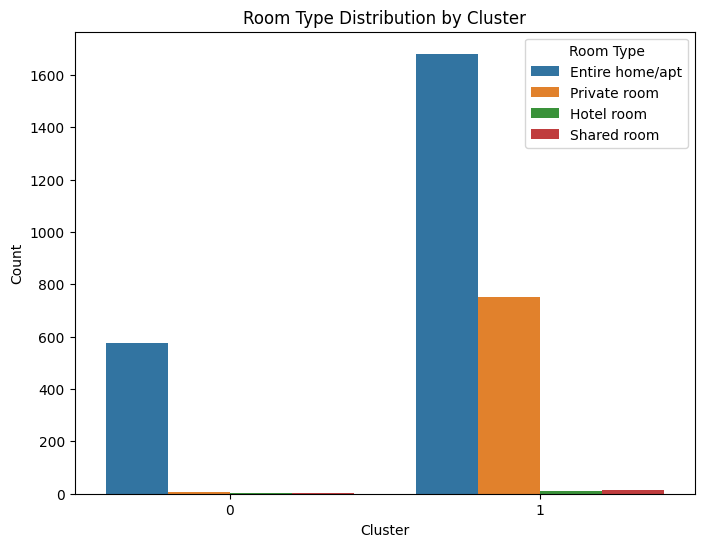

In [971]:
plt.figure(figsize=(8, 6))
sns.countplot(x='cluster', hue='room_type', data=vaud_cleaned1)
plt.title('Room Type Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Room Type')
plt.show()

***This bar chart shows the Room Type Distribution by Cluster:***

- *Cluster 0 (Diverse Premium Rentals) is dominated by entire home/apartment listings, with almost no presence of other room types. This aligns with its premium nature, offering full-property rentals.*

- *Cluster 1 (Standard Economy Rentals) has a broader mix, including many entire home/apartment and private room listings, and small counts of hotel and shared rooms, reflecting greater affordability and diversity.*

*In short, Cluster 0 caters to full-property premium stays, while Cluster 1 includes a mix of room types targeting a broader, budget-conscious customers.*

**Violin Plot: Review Scores by Cluster**

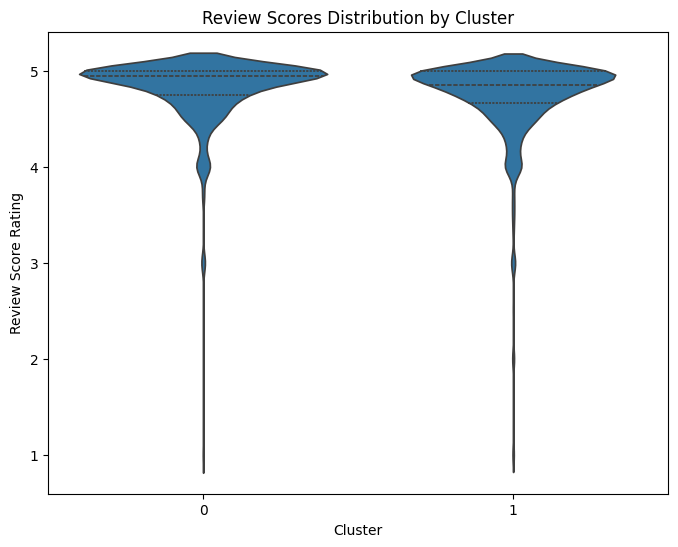

In [972]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='cluster', y='review_scores_rating', data=vaud_cleaned1, inner='quartile')
plt.title('Review Scores Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Review Score Rating')
plt.show()


***This violin plot shows the Review Scores Distribution by Cluster:***

- *Both Cluster 0 (Diverse Premium Rentals) and Cluster 1 (Standard Economy Rentals) have similarly high review ratings, tightly concentrated around 4.8 to 5.0, indicating strong customer satisfaction across both segments.*

- *The density and shape show a slight spread below 4.5 for Cluster 1, suggesting a bit more variation in guest experiences compared to Cluster 0.*

*Overall, both clusters are perceived positively, reinforcing that both premium and economy listings maintain high standards.*

**Clustering K-Mean Model Summary**

- *To explore clustering among rental units in our city, we first carefully selected features that could meaningfully differentiate listings. We prioritized numerical variables related to listing characteristics such as price, availability, minimum nights, and property features.*

- *To enhance clustering performance, we also performed feature engineering by scaling variables and applying Principal Component Analysis (PCA) to reduce dimensionality.*

- *Using the elbow method, we determined that the optimal number of clusters was 2, as the within-cluster sum of squares (WCSS) showed a significant bend at k = 2. After applying k-means clustering with two clusters, we visualized the results using PCA-reduced components, clearly observing two distinct groupings of rental units.*

- *Cluster 0 can be interpreted as higher-priced or less frequently available rental units with more variation in characteristics (as seen by the wider spread in the PCA plot), likely representing premium or specialty rentals.*

- *Cluster 1 appears more tightly grouped, representing standard or economy rental units with relatively consistent features and pricing. Overall, the combination of feature scaling, dimensionality reduction, and elbow method for optimal k selection provided a structured approach that resulted in clear, interpretable clusters of rental properties.*



# **Conclusions (5 points)**

**Our comprehensive data mining project on Airbnb listings in Vaud, Switzerland, leveraged multiple analytical techniques to generate actionable insights for hosts, travelers, and platform strategists.**

***Linear Regression*** *was used to predict nightly prices based on listing characteristics like number of beds, bathrooms, and availability. With an R² of 0.62, the model revealed that listings with more amenities and higher availability tend to command higher prices. Hosts can use this to adjust features and availability to optimize revenue.*

***k-Nearest Neighbors (k-NN)*** *was applied to classify whether a listing offers amenities like Wi-Fi or free parking based on numeric features. This supports hosts in benchmarking their offerings and understanding what amenities are typical for certain property profiles.*

***Naive Bayes*** *was used to predict perceived value (binned review_scores_value), enabling us to model customer satisfaction using affordable feature inputs. This helps identify which types of listings are more likely to deliver a high perceived value, supporting customer retention strategies.*

***Classification Tree*** *predicted host_response_time using features like review activity and availability. The resulting decision paths highlighted patterns in responsiveness, useful for improving host performance benchmarks and Airbnb's host rating systems.*

***Clustering (k-Means)*** *grouped listings based on price, location, availability, and review counts. This segmentation revealed distinct groups such as high-end urban rentals, budget rural options, and mid-range tourist hotspots—crucial insights for targeted marketing and personalized user experiences.*

***In summary,*** *this multi-model approach provides Airbnb and its hosts with strategic tools to improve pricing, amenity planning, customer satisfaction, operational readiness, and marketing segmentation. These insights are transferable to any location with Airbnb presence and set a solid foundation for data-driven decision-making in the short-term rental market.*